### 1. Sales Analysis

#### Goal: Understand sales performance over time and the best-selling products.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Pivot Analysis/pivot table.xlsx')

# Display the first few rows of the dataset
print(data.head())


   Row ID  Order ID Order Date Order Priority  Order Quantity    Sales  \
0    1445     10437 2009-08-18       Critical              50   820.52   
1    7103     50688 2011-12-16       Critical              50   600.22   
2    7813     55875 2009-11-25       Critical              50   413.86   
3    3214     23076 2009-05-27       Critical              50   742.21   
4    5715     40480 2011-12-07       Critical              50  1270.03   

   Discount    Ship Mode   Profit  Unit Price  ...    Customer Name  \
0      0.01  Regular Air -191.222       15.99  ...        Don Jones   
1      0.08  Regular Air   27.860       12.98  ...         Joy Bell   
2      0.00  Regular Air   39.290        7.59  ...       Brad Eason   
3      0.03  Regular Air  122.210       14.20  ...  Dan Reichenbach   
4      0.10  Regular Air  221.810       26.48  ...     Harold Engle   

                Province                 Region Customer Segment  \
0  Northwest Territories  Northwest Territories        Corpo

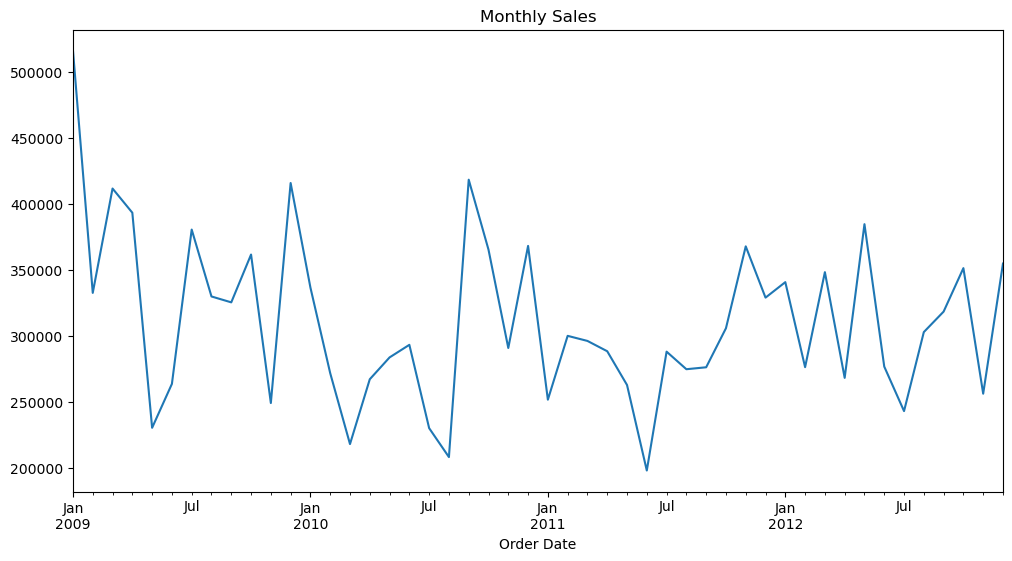

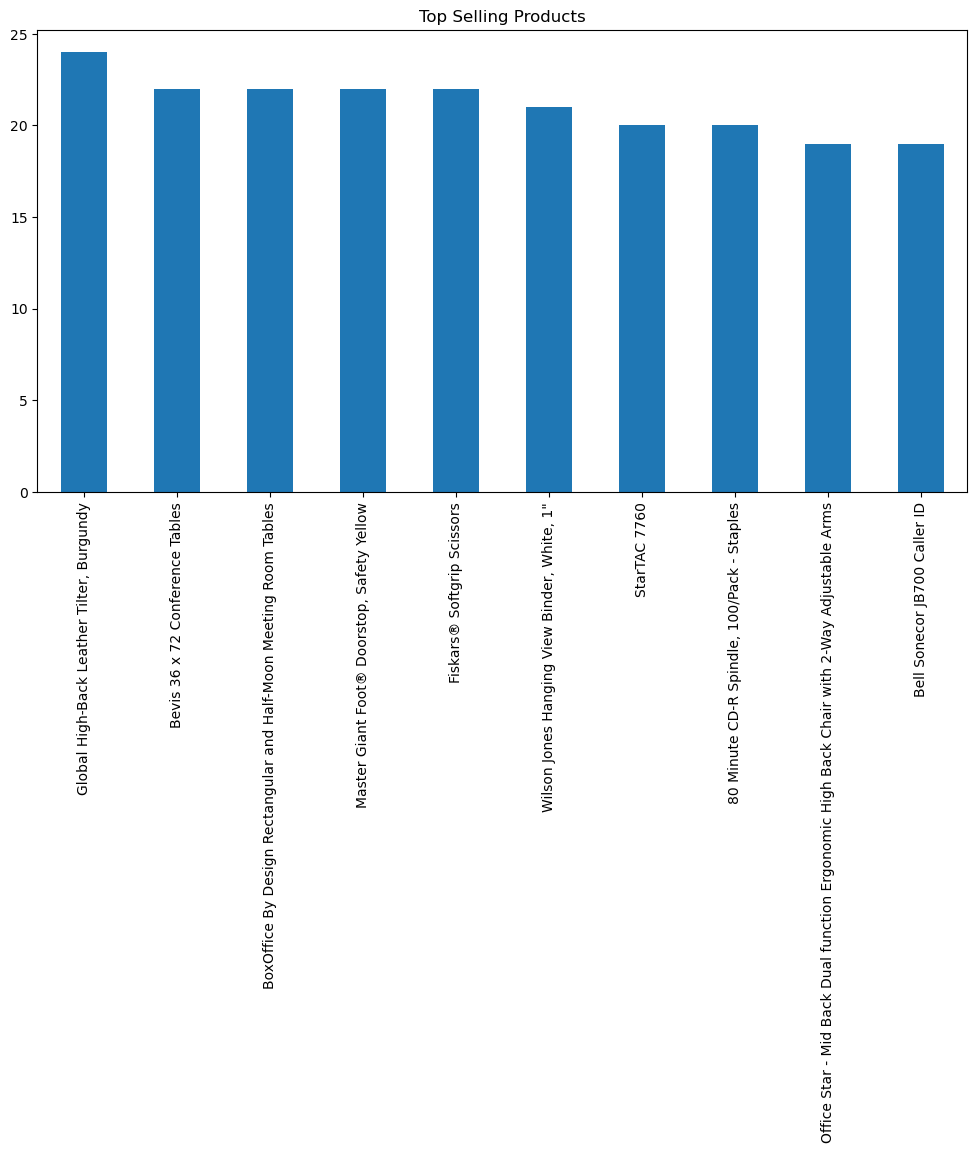

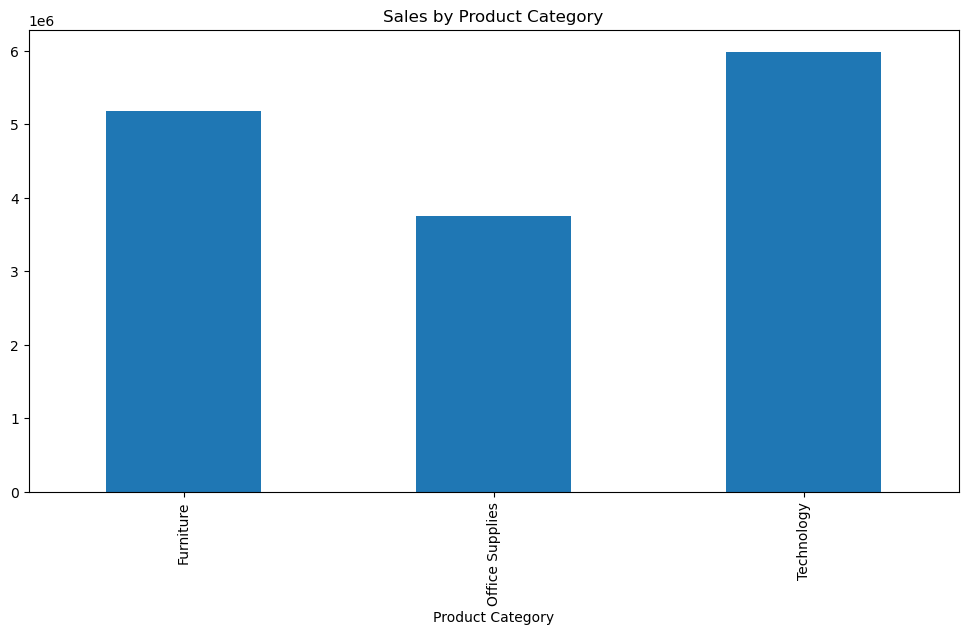

In [15]:
# convert Order Date to datetime format and set it as the index
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)

# calculate monthly sales
monthly_sales = data['Sales'].resample('M').sum()

# plot monthly sales
plt.figure(figsize=(12, 6))
plt.title('Monthly Sales')
monthly_sales.plot()
plt.show()

# calculate top selling products
top_products = data['Product Name'].value_counts().head(10)

# plot top selling products
plt.figure(figsize=(12, 6))
plt.title('Top Selling Products')
top_products.plot(kind='bar')
plt.show()

# calculate sales by product category
category_sales = data.groupby('Product Category')['Sales'].sum()

# plot sales by product category
plt.figure(figsize=(12, 6))
plt.title('Sales by Product Category')
category_sales.plot(kind='bar')
plt.show()


### 2. Customer Segmentation

#### Goal: Understand customer behavior and classify customers into different segments.

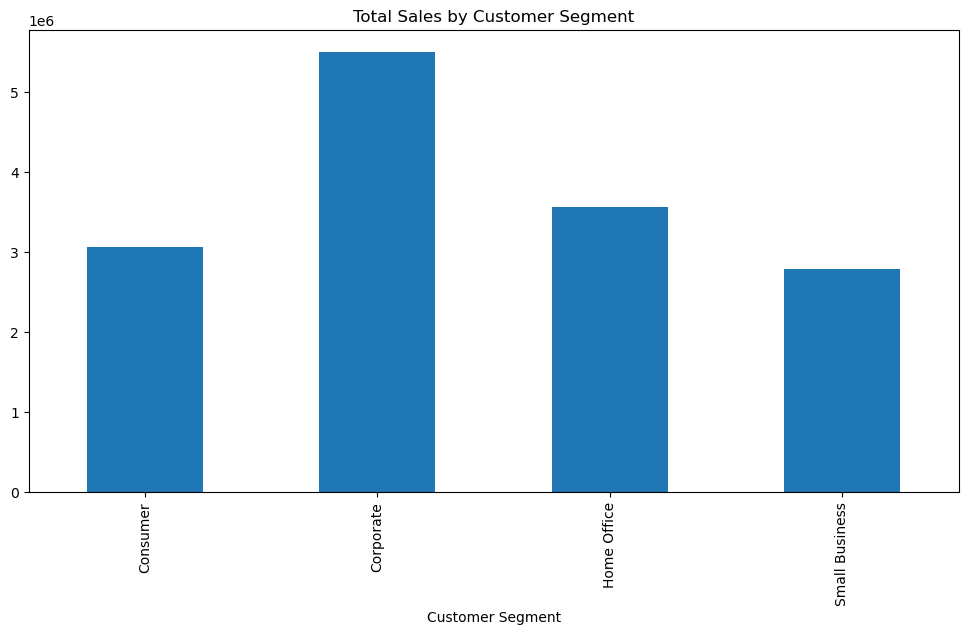

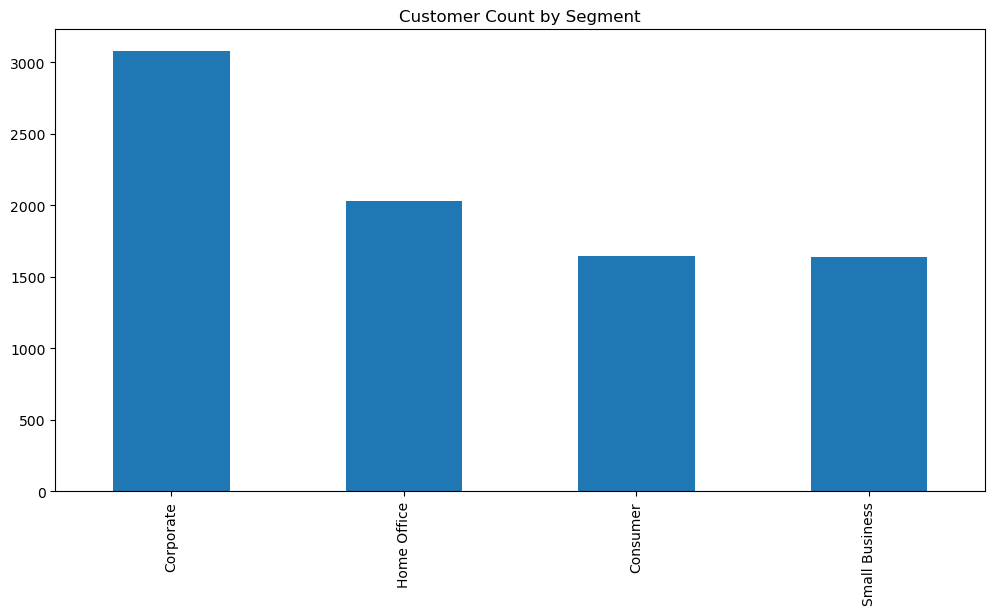

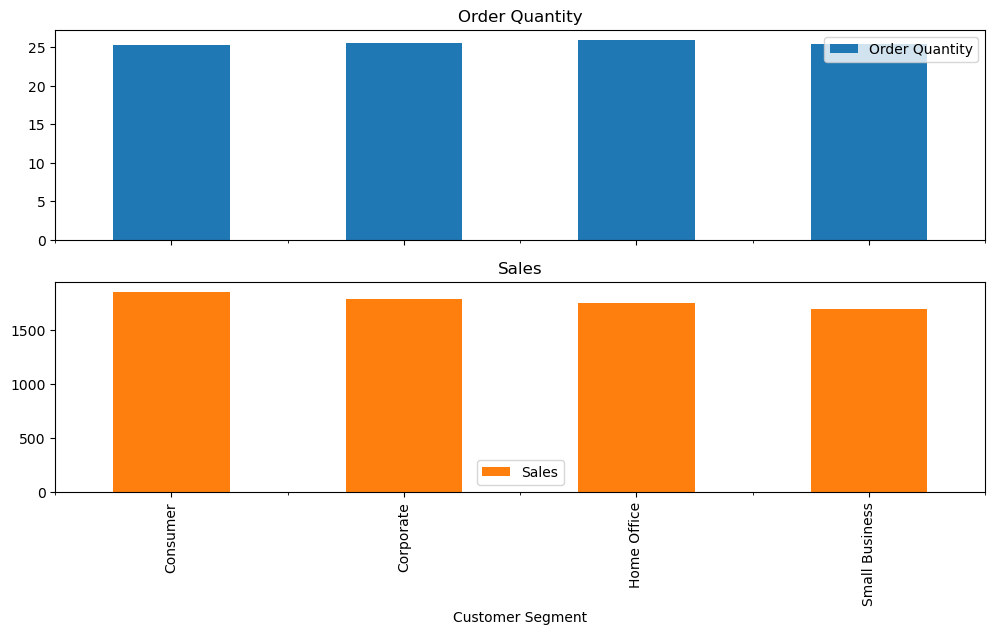

In [16]:
# calculate total sales by customer segment
segment_sales = data.groupby('Customer Segment')['Sales'].sum()

# plot total sales by customer segment
plt.figure(figsize=(12, 6))
plt.title('Total Sales by Customer Segment')
segment_sales.plot(kind='bar')
plt.show()

# count of customers in each segment
segment_counts = data['Customer Segment'].value_counts()

# plot customer count by segment
plt.figure(figsize=(12, 6))
plt.title('Customer Count by Segment')
segment_counts.plot(kind='bar')
plt.show()

# calculate average order quantity and sales by customer segment
segment_avg = data.groupby('Customer Segment').agg({'Order Quantity': 'mean', 'Sales': 'mean'})

# plot average order quantity and sales by customer segment
segment_avg.plot(kind='bar', subplots=True, figsize=(12, 6))
plt.show()


### 3. Profitability Analysis
#### Goal: Understand the profitability of products and product categories.

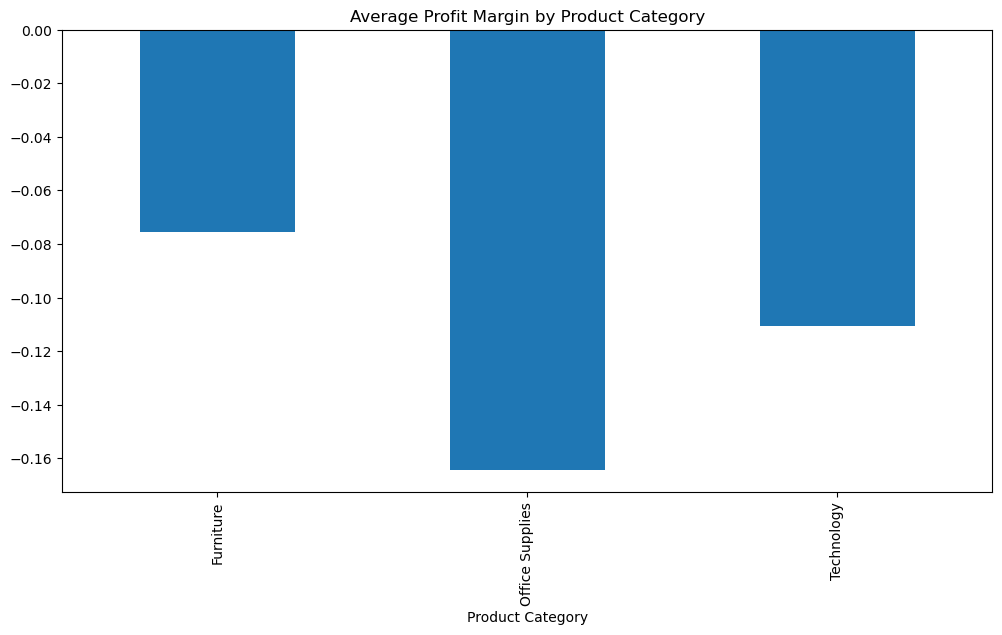

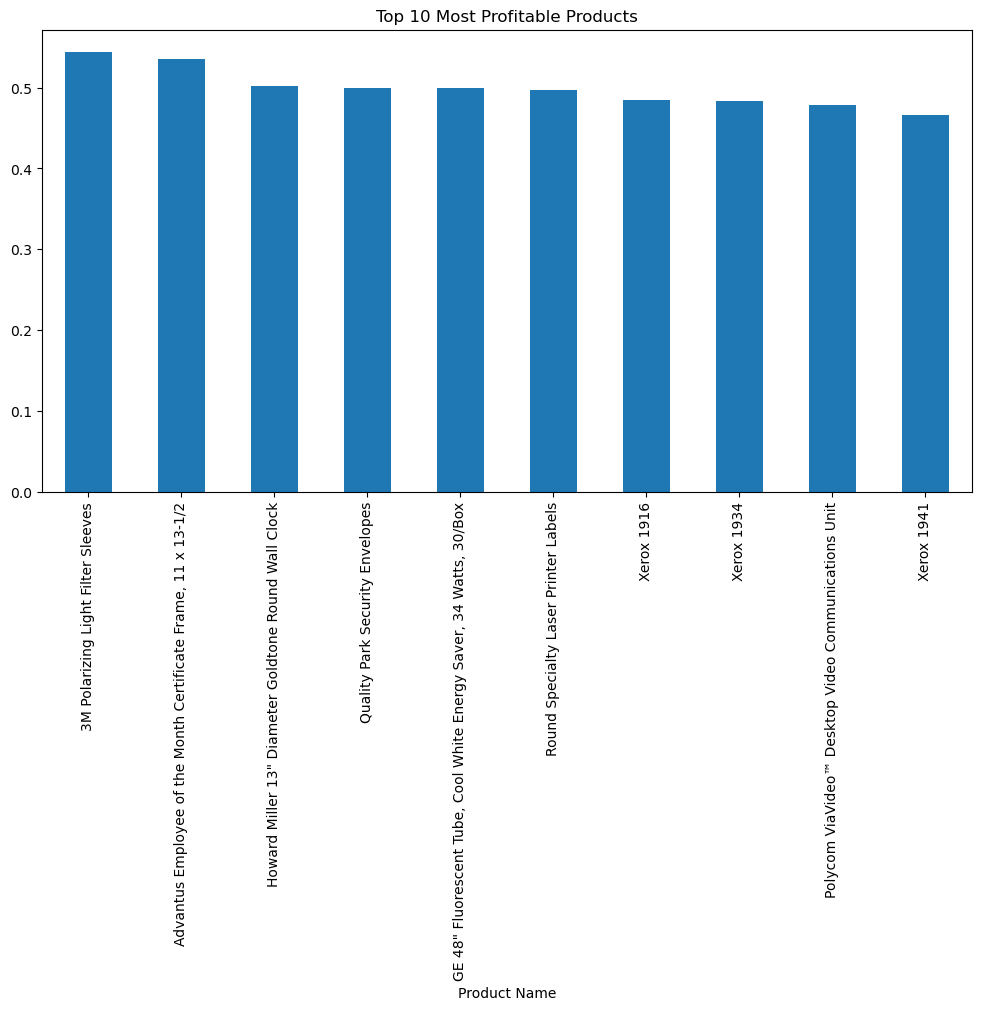

In [17]:
# calculate profit margin (Profit/Sales)
data['Profit Margin'] = data['Profit'] / data['Sales']

# calculate average profit margin by product category
category_profit_margin = data.groupby('Product Category')['Profit Margin'].mean()

# plot average profit margin by product category
plt.figure(figsize=(12, 6))
plt.title('Average Profit Margin by Product Category')
category_profit_margin.plot(kind='bar')
plt.show()

# calculate average profit margin by product
product_profit_margin = data.groupby('Product Name')['Profit Margin'].mean()

# get top 10 most profitable products
top_profitable_products = product_profit_margin.sort_values(ascending=False).head(10)

# plot top 10 most profitable products
plt.figure(figsize=(12, 6))
plt.title('Top 10 Most Profitable Products')
top_profitable_products.plot(kind='bar')
plt.show()


In [18]:
# Import pandas library
import pandas as pd

# Load the data
data = pd.read_excel('/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Pivot Analysis/pivot table.xlsx')  # replace with your file path

# Calculate profit margin (Profit/Sales)
data['Profit Margin'] = data['Profit'] / data['Sales']

# Calculate average profit margin by product category
category_profit_margin = data.groupby('Product Category')['Profit Margin'].mean()
print(category_profit_margin)


Product Category
Furniture         -0.075606
Office Supplies   -0.164373
Technology        -0.110478
Name: Profit Margin, dtype: float64


Based on the output, it seems that all product categories are, on average, not profitable as they have negative profit margins. This is concerning as it suggests that the costs associated with the products in all categories are greater than the sales, leading to a loss.

Here are a few possible reasons for this:

The prices of the products might be too low. If the products are priced lower than their cost (including any overheads), the company will make a loss.

The costs might be too high. If the company is spending too much on production or procurement, overheads, or shipping, these costs can eat into the profit margin.

The discounts might be too steep. High discounts can lead to low or negative profit margins.

There could be data entry errors, especially if the profits are supposed to be positive.

We might want to look into these issues to identify the cause of the negative profit margins. It might also be beneficial to analyze the profit margins of individual products to identify if there are specific products that are causing the loss.

### 4. Geographical Analysis

#### Goal: Understand sales, profits, and customer distribution by geographical location.

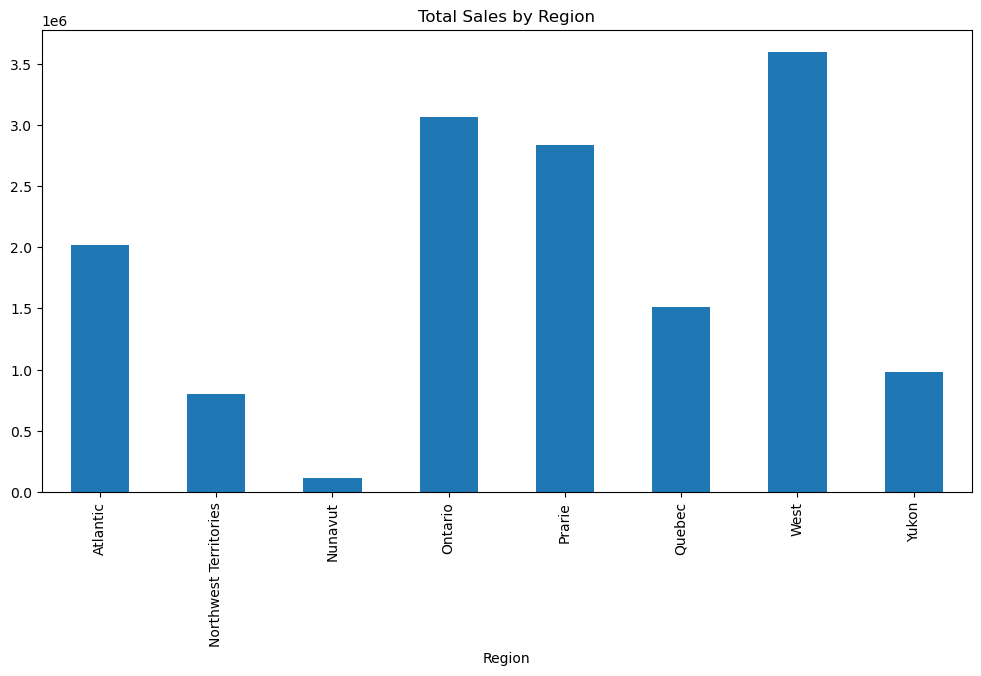

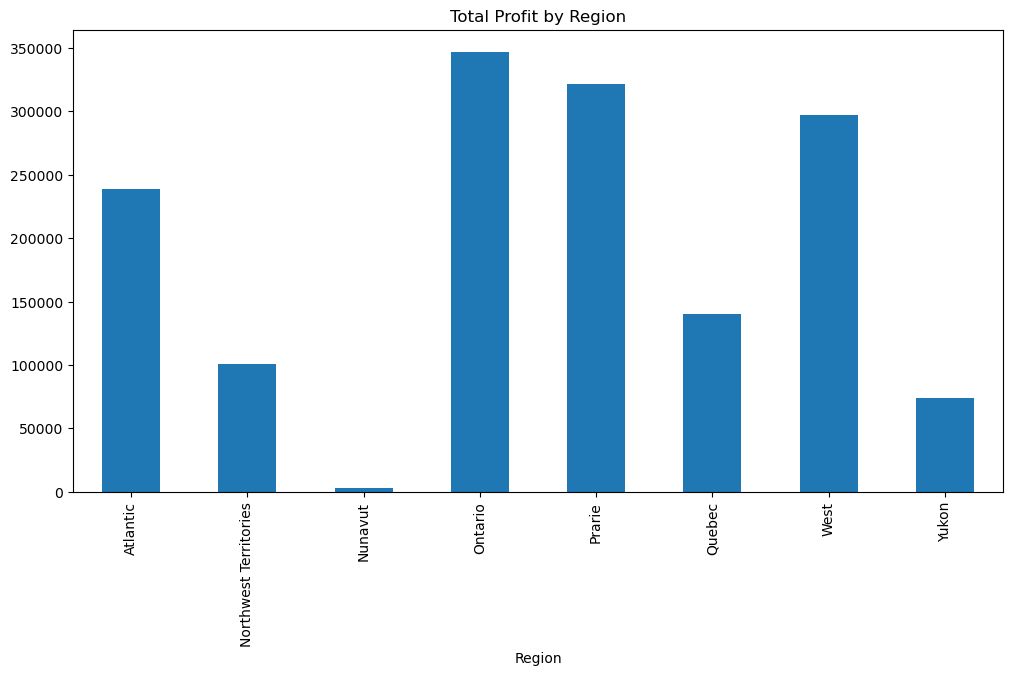

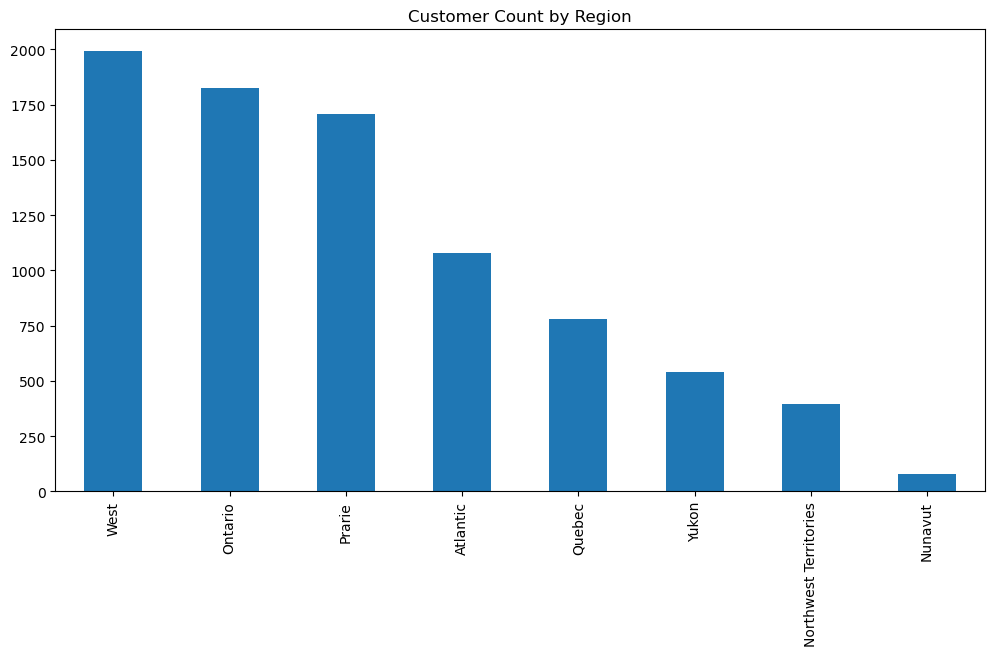

In [19]:
# calculate total sales by region
region_sales = data.groupby('Region')['Sales'].sum()

# plot total sales by region
plt.figure(figsize=(12, 6))
plt.title('Total Sales by Region')
region_sales.plot(kind='bar')
plt.show()

# calculate total profit by region
region_profit = data.groupby('Region')['Profit'].sum()

# plot total profit by region
plt.figure(figsize=(12, 6))
plt.title('Total Profit by Region')
region_profit.plot(kind='bar')
plt.show()

# count of customers by region
region_counts = data['Region'].value_counts()

# plot customer count by region
plt.figure(figsize=(12, 6))
plt.title('Customer Count by Region')
region_counts.plot(kind='bar')
plt.show()


### 5. Order Priority and Shipping Analysis

#### Goal: Understand the relationship between order priority, shipping mode, and other variables like sales and profit.

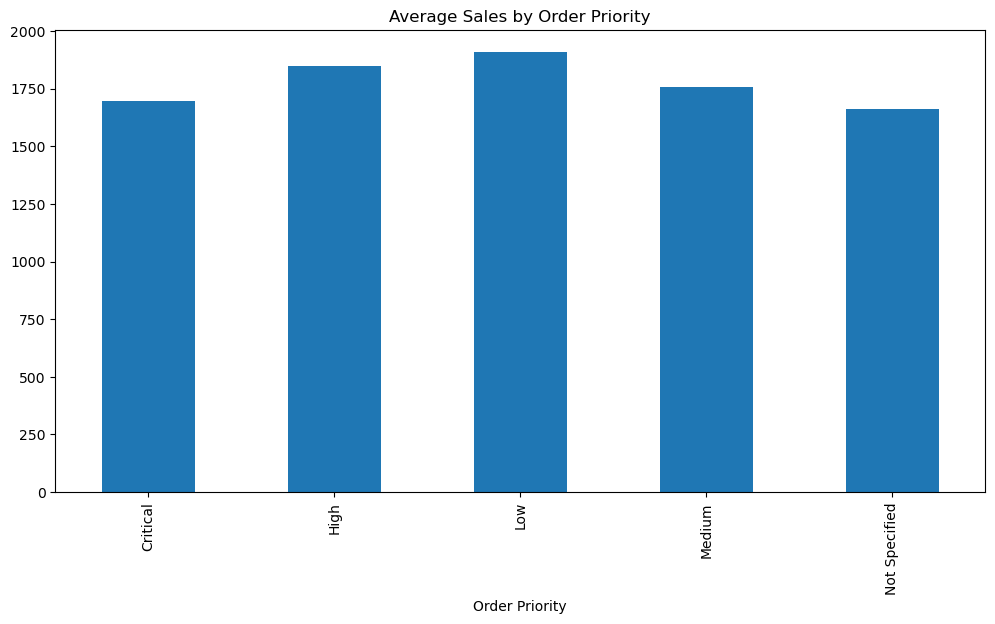

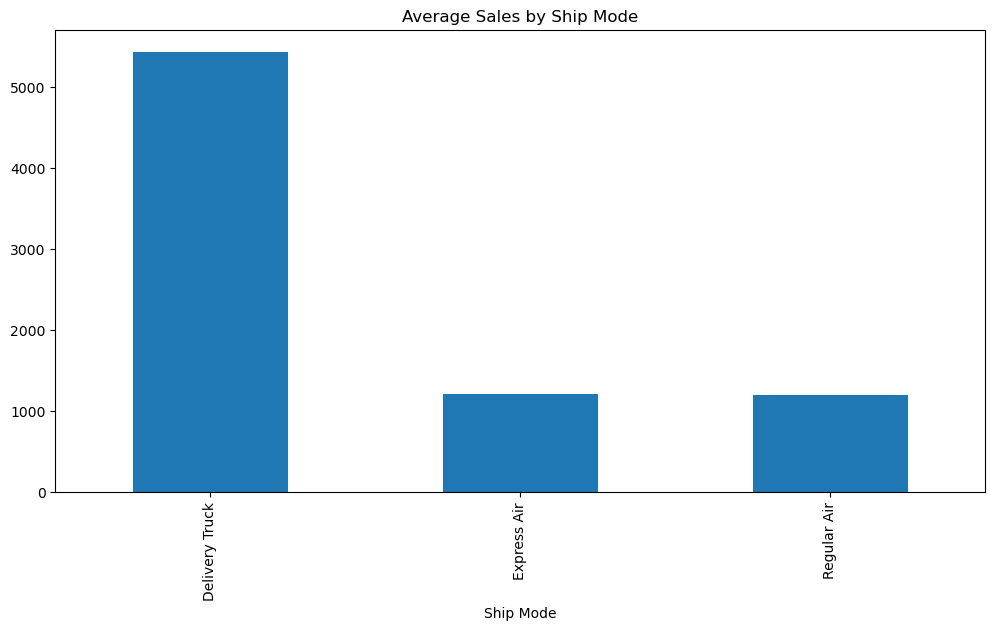

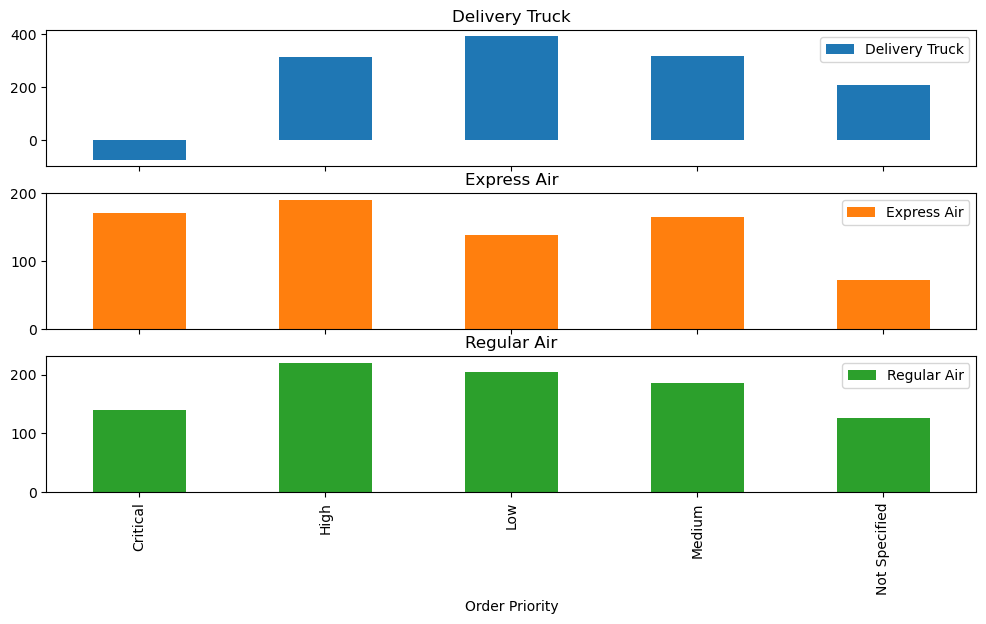

In [20]:
# calculate average sales by order priority
priority_sales = data.groupby('Order Priority')['Sales'].mean()

# plot average sales by order priority
plt.figure(figsize=(12, 6))
plt.title('Average Sales by Order Priority')
priority_sales.plot(kind='bar')
plt.show()

# calculate average sales by ship mode
shipmode_sales = data.groupby('Ship Mode')['Sales'].mean()

# plot average sales by ship mode
plt.figure(figsize=(12, 6))
plt.title('Average Sales by Ship Mode')
shipmode_sales.plot(kind='bar')
plt.show()

# calculate average profit by order priority and ship mode
priority_shipmode_profit = data.groupby(['Order Priority', 'Ship Mode'])['Profit'].mean().unstack()

# plot average profit by order priority and ship mode
priority_shipmode_profit.plot(kind='bar', subplots=True, figsize=(12, 6))
plt.show()
